\begin{center}
\LARGE ML Assignment 1\\
    
     Madhur Singhal\\
     2015CS10235\\
     
\end{center} 

## Q1 Linear Regression
In this problem, we will implement least squares linear regression to predict density of wine based on its
acidity. We will also use 3D plotting and contour plotting to observe how our gradient descent converges. The loss function and update equations are shown below.
$$ J(\theta) = \frac{1}{2}[\sum_{i=1}^m(h_\theta (x^{(i)}) - y^{(i)})^2 ] $$
$$ \frac{\partial}{\partial \theta_j}J(\theta) = \frac{1}{m}[\sum_{i=1}^m(h_\theta (x^{(i)}) - y^{(i)})x^{(i)}_j ] $$ 
We use gradient descent to optimize the cost function and find out the values of parameters.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
from mpl_toolkits.mplot3d import Axes3D

In [2]:
%matplotlib inline

In [3]:
wine_x = np.genfromtxt("Assignment_1_datasets/linearX.csv")
wine_x = (wine_x - np.mean(wine_x)) / np.std(wine_x)
wine_x = np.vstack((wine_x,np.ones_like(wine_x)))
wine_x = wine_x.T
wine_y = np.genfromtxt("Assignment_1_datasets/linearY.csv")

In [4]:
theta  = np.asarray([0,0]) # theta_1,theta_0
lr = 0.001

diff = wine_y - np.matmul(wine_x,theta)
loss = 0.5 * np.matmul(diff.T,diff)
ch_loss = 2
itera = 1

In [5]:
def compute_cost(t1,t0):
        diff = wine_y - np.matmul(wine_x,np.asarray([t1,t0]))
        loss = 0.5 * np.matmul(diff.T,diff)
        return loss

theta_0 = np.arange(-2, 2, 0.01)
theta_1 = np.arange(-2, 2, 0.01)
theta_1, theta_0 = np.meshgrid(theta_1, theta_0)

cost = [[compute_cost(theta_1[i, j] , theta_0[i,j])
             for j in range(theta_1.shape[0])] for i in range(theta_0.shape[0])]
cost = np.asarray(cost)

Since this is just a report so proper animation is not possible here, thus to view the plots interactively I have provided a separate python file in the folder (plots.py). In this report I have shown the final images produced only.

Below are the three plots produced for learning rate of 0.0001 and the parameters learnt.

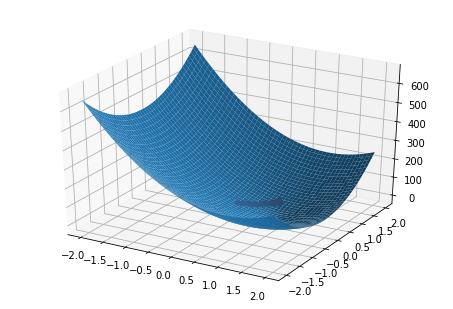

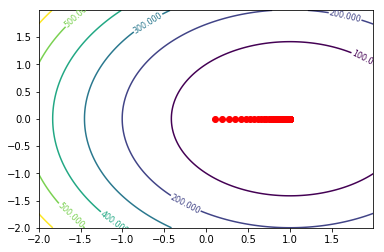

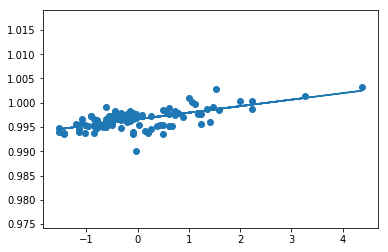

In [6]:
fig_1 = plt.figure()
ax_1 = Axes3D(fig_1)
surf_1 = ax_1.plot_surface(theta_0, theta_1, cost)

fig_2 = plt.figure()
ax_2 = fig_2.add_subplot(111)
CS = ax_2.contour(theta_0, theta_1, cost)
ax_2.clabel(CS, inline=1, inline_spacing=0, fontsize=8)

while np.abs(ch_loss) > 1e-11:
    
    diff = wine_y - np.matmul(wine_x,theta)
    loss = 0.5 * np.matmul(diff.T,diff)
    theta = theta + lr * np.matmul(wine_x.T,diff)
    itera+=1
    diff = wine_y - np.matmul(wine_x,theta)
    loss_new = 0.5 * np.matmul(diff.T,diff) # can be commented out
    ch_loss = loss - loss_new
    ax_1.scatter(theta[1],theta[0],compute_cost(theta[1],theta[0]),c="r")
    ax_2.scatter(theta[1],theta[0],c="r")
    if itera % 300 == 0:
        print("Iteration - ", itera)
        print("Loss - ",loss_new)
        print("LR - ",lr)
        print("Change in Loss - ",ch_loss)
        print("Theta -- ", theta)
        print("--------------")
fig_3 =  plt.figure()
ax_3 = fig_3.add_subplot(111)
ax_3.scatter(wine_x.T[0],wine_y)
ax_3.plot(wine_x.T[0],theta[1] + theta[0]*wine_x.T[0])

Finally we do the last part and see the contours for different learning rates.

In [9]:
def perform(lr):
    theta  = np.asarray([0,0]) # theta_1,theta_0
    diff = wine_y - np.matmul(wine_x,theta)
    loss = 0.5 * np.matmul(diff.T,diff)
    ch_loss = 2
    itera = 1
    
    fig_1 = plt.figure()
    ax_1 = Axes3D(fig_1)
    surf_1 = ax_1.plot_surface(theta_0, theta_1, cost)
#     ax_1.text(0.7,0.1,0.3,"LR = "+str(lr),fontsize=16)
    fig_2 = plt.figure()
    ax_2 = fig_2.add_subplot(111)
    CS = ax_2.contour(theta_0, theta_1, cost)
    ax_2.clabel(CS, inline=1, inline_spacing=0, fontsize=8)
#     ax_2.text(0.7,0.1,"LR = "+str(lr),fontsize=16)
    while np.abs(ch_loss) > 1e-10:

        diff = wine_y - np.matmul(wine_x,theta)
        loss = 0.5 * np.matmul(diff.T,diff)
        theta = theta + lr * np.matmul(wine_x.T,diff)
        itera+=1
        diff = wine_y - np.matmul(wine_x,theta)
        loss_new = 0.5 * np.matmul(diff.T,diff) # can be commented out
        ch_loss = loss - loss_new
        ax_1.scatter(theta[1],theta[0],compute_cost(theta[1],theta[0]),c="r")
        ax_2.scatter(theta[1],theta[0],c="r")
    print("---------------")
    print("LR - ",lr)
    print("Iterations needed - ", itera)
    print("Loss - ",loss_new)
    print("Change in Loss - ",ch_loss)
    print("Theta -- ", theta)
    print("----------------")
    fig_3 =  plt.figure()
    ax_3 = fig_3.add_subplot(111)
    ax_3.scatter(wine_x.T[0],wine_y)
#     ax_3.text(0.7,0.1,"LR = "+str(lr),fontsize=16)
    ax_3.plot(wine_x.T[0],theta[1] + theta[0]*wine_x.T[0])

For LR  = 0.001, following are the stats and the  plots obtained.

---------------
LR -  0.001
Iterations needed -  122
Loss -  0.00011947940058425674
Change in Loss -  9.839792527869054e-11
Theta --  [0.00134019 0.9966172 ]
----------------


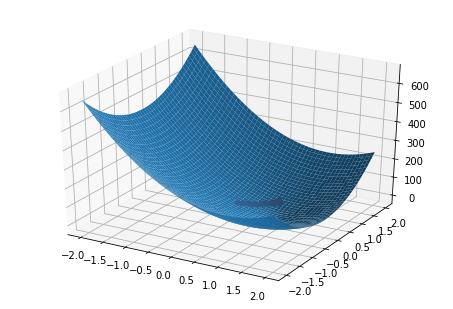

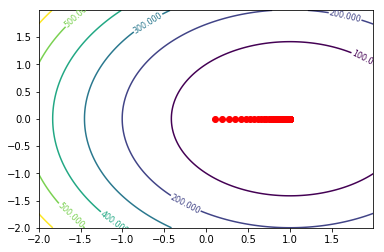

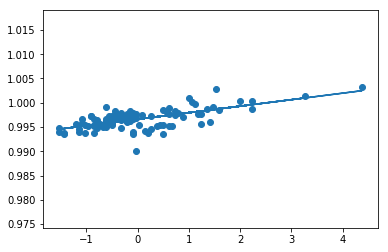

In [10]:
perform(0.001)

For LR  = 0.005, following are the stats and the  plots obtained.

---------------
LR -  0.005
Iterations needed -  22
Loss -  0.00011947899239035003
Change in Loss -  3.3875952444670926e-11
Theta --  [0.0013402  0.99661962]
----------------


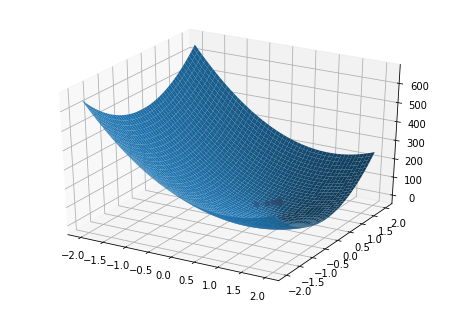

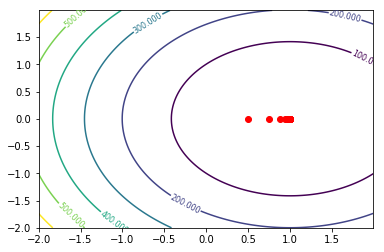

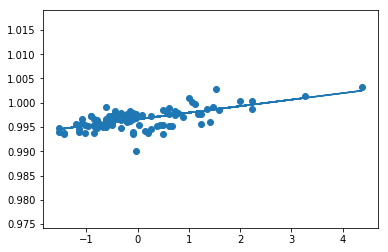

In [11]:
perform(0.005)

For LR  = 0.009, following are the stats and the  plots obtained.

---------------
LR -  0.009
Iterations needed -  8
Loss -  0.000119478981594993
Change in Loss -  4.916604441824492e-11
Theta --  [0.0013402 0.99662  ]
----------------


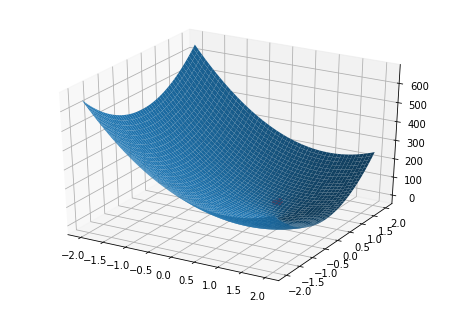

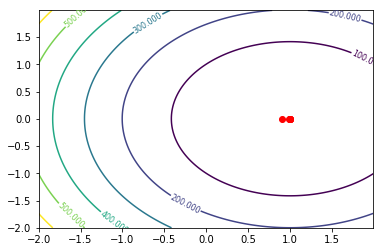

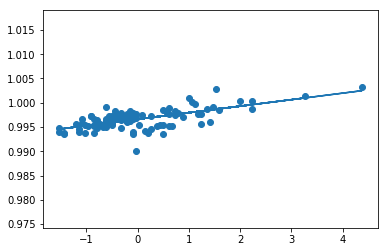

In [12]:
perform(0.009)

For LR  = 0.013, following are the stats and the  plots obtained.

---------------
LR -  0.013
Iterations needed -  14
Loss -  0.00011947898236072468
Change in Loss -  1.2763846511838761e-11
Theta --  [0.0013402  0.99662026]
----------------


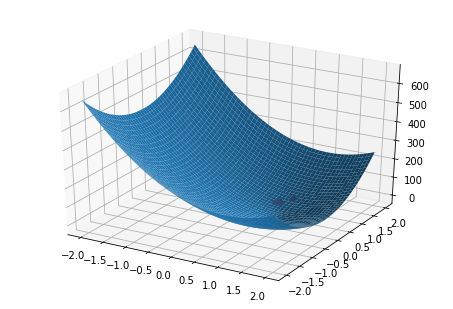

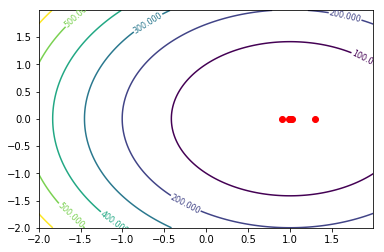

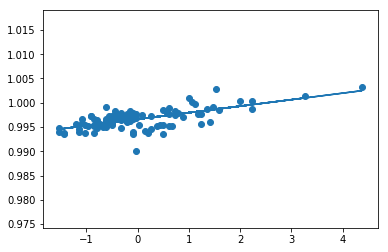

In [13]:
perform(0.013)

For LR  = 0.017, following are the stats and the  plots obtained.

---------------
LR -  0.017
Iterations needed -  39
Loss -  0.00011947906494412838
Change in Loss -  8.72680353545055e-11
Theta --  [0.00134019 0.99661881]
----------------


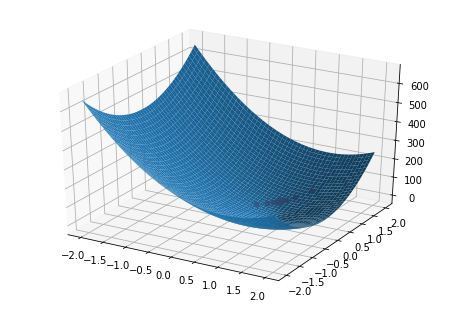

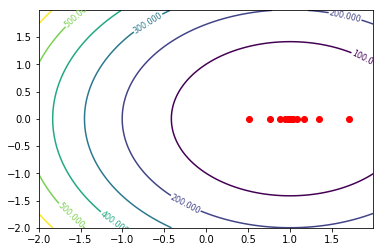

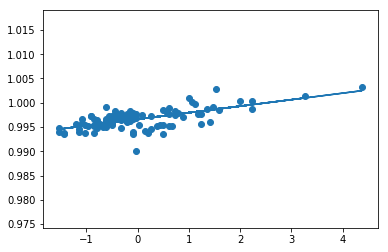

In [14]:
perform(0.017)

For the other two values of LR given, gradient descent diverges and python gives an overflow error after some iterations.

The main observation is that a moderate value of learning rate (0.009 here) is the best as there are problems on both sides of the spectrum. For large learning rates gradient descent can oscillate about the minimum for quite some time as seen here with LR = 0.017. Also gradient descent can diverge too if the learning rate is too high (more than 0.2 here). For small learning rates, gradient descent takes a large time to converge as can be seen by comparing the different number of iterations taken using different learning rates.
With LR = 0.009 our gradient descent converges in just 8 iterations with a final loss of $10^{-4}$.